### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Importing Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('Covid Dataset.csv')

Saving Covid Dataset.csv to Covid Dataset (1).csv


### Dataset Information

In [ ]:
print("\nShape of the Dataset (Rows, Columns):")
print(df.shape)

print("\nData Types of Each Column:")
print(df.dtypes)


Shape of the Dataset (Rows, Columns):
(5434, 21)

Data Types of Each Column:
Breathing Problem                          object
Fever                                      object
Dry Cough                                  object
Sore throat                                object
Running Nose                               object
Asthma                                     object
Chronic Lung Disease                       object
Headache                                   object
Heart Disease                              object
Diabetes                                   object
Hyper Tension                              object
Fatigue                                    object
Gastrointestinal                           object
Abroad travel                              object
Contact with COVID Patient                 object
Attended Large Gathering                   object
Visited Public Exposed Places              object
Family working in Public Exposed Places    object
Wearing Masks         

### Distribution of Target Variable

COVID-19
Yes    4383
No     1051
Name: count, dtype: int64


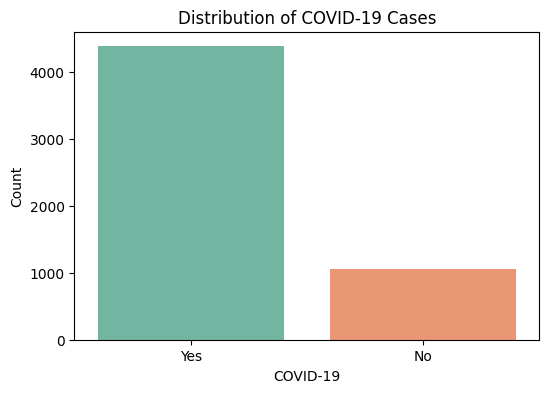

In [ ]:
print(df['COVID-19'].value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x='COVID-19', data=df, hue='COVID-19', palette='Set2', legend=False)
plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19')
plt.ylabel('Count')
plt.show()

In [ ]:
print(df.head())

  Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1           

### Label Encoder

In [ ]:
label_encoder = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

    Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                   1      1          1            1             1       0   
3                   1      1          1            0             0       1   
7                   1      1          1            0             1       1   
12                  1      1          1            1             0       1   
21                  1      1          1            0             1       1   

    Chronic Lung Disease  Headache  Heart Disease  Diabetes  Hyper Tension  \
0                      0         0              0         1              1   
3                      0         0              1         1              0   
7                      0         0              0         1              1   
12                     1         0              0         0              1   
21                     1         0              0         0              1   

    Fatigue   Gastrointestinal   Abroad travel  Contact with C

### Undersampling

In [ ]:
covid_positive = df[df['COVID-19'] == 1]
covid_negative = df[df['COVID-19'] == 0]

num_to_remove = abs(len(covid_positive) - len(covid_negative))

if num_to_remove > 0:
    if len(covid_positive) > len(covid_negative):
        rows_to_remove = covid_positive.sample(n=num_to_remove, random_state=0).index
    else:
        rows_to_remove = covid_negative.sample(n=num_to_remove, random_state=0).index

    df = df.drop(rows_to_remove)

print(df['COVID-19'].value_counts())

COVID-19
1    1051
0    1051
Name: count, dtype: int64


### Distribution of Target Variable

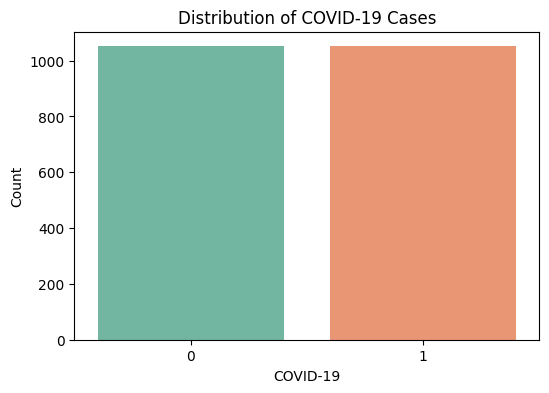

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='COVID-19', data=df, hue='COVID-19', palette='Set2', legend=False)
plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19')
plt.ylabel('Count')
plt.show()

### Checking Missing Values

In [ ]:
print("\nMissing Values: \n")
print(df.isnull().sum())


Missing Values: 

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64


### Correlation Heatmap

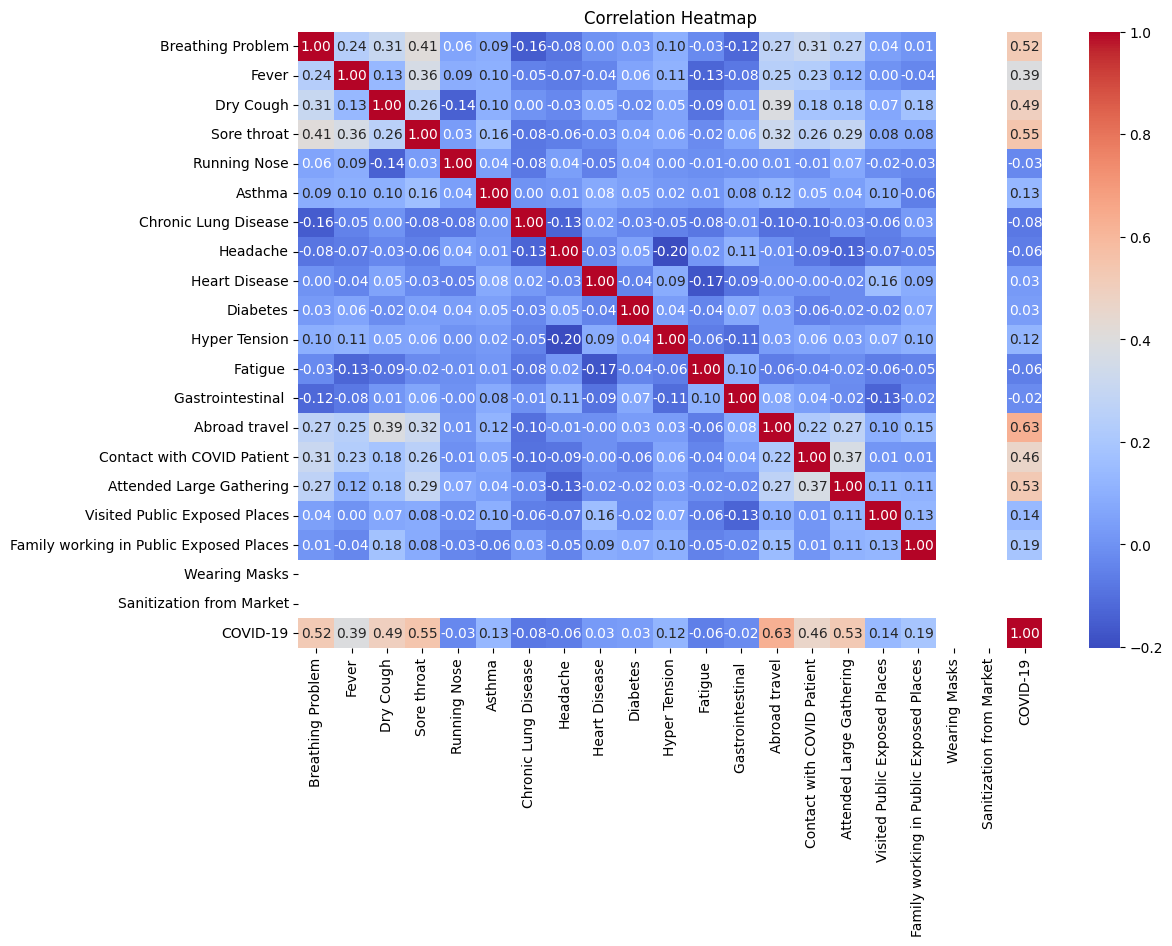

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Dropping Features

In [ ]:
df = df.drop(columns=['Wearing Masks'])
df = df.drop(columns=['Sanitization from Market'])

### Feature-Target Split

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Split data into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1576, 18) (1576,)
Test set: (526, 18) (526,)


### Train logistic regression model

In [ ]:
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

LogisticRegression()

### Prediction for logistic Regression

In [ ]:
y_predLR = modelLR.predict(X_test)

### Model evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_predLR)
conf_matrix = confusion_matrix(y_test, y_predLR)
class_report = classification_report(y_test, y_predLR)

print(f'Accuracy: {accuracy*100:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 95.63

Confusion Matrix:
 [[254   5]
 [ 18 249]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       259
           1       0.98      0.93      0.96       267

    accuracy                           0.96       526
   macro avg       0.96      0.96      0.96       526
weighted avg       0.96      0.96      0.96       526



### Train KNN Model

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

### Prediction for KNN

In [ ]:
y_predKNN = classifier.predict(X_test)

### KNN Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_predKNN)
conf_matrix = confusion_matrix(y_test, y_predKNN)
class_report = classification_report(y_test, y_predKNN)

print(f'Accuracy: {accuracy*100:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 95.63

Confusion Matrix:
 [[259   0]
 [ 23 244]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96       259
           1       1.00      0.91      0.95       267

    accuracy                           0.96       526
   macro avg       0.96      0.96      0.96       526
weighted avg       0.96      0.96      0.96       526



### Train Random Forest Classifier

In [ ]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=0)
modelRF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Prediction for Random Forest Classifier

In [ ]:
y_predRF = modelRF.predict(X_test)

### Random Forest Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_predRF)
conf_matrix = confusion_matrix(y_test, y_predRF)
class_report = classification_report(y_test, y_predRF)

print('Random Forest')
print(f'Accuracy: {accuracy*100:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Random Forest
Accuracy: 98.67

Confusion Matrix:
 [[259   0]
 [  7 260]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       259
           1       1.00      0.97      0.99       267

    accuracy                           0.99       526
   macro avg       0.99      0.99      0.99       526
weighted avg       0.99      0.99      0.99       526



### Train SVM

In [ ]:
modelSVM = SVC(kernel='linear', random_state=0)  # You can experiment with different kernels like 'rbf', 'poly'
modelSVM.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Prediction for SVM

In [ ]:
y_predSVM = modelSVM.predict(X_test)

### Evaluation for SVM

In [ ]:
accuracy = accuracy_score(y_test, y_predSVM)
conf_matrix = confusion_matrix(y_test, y_predSVM)
class_report = classification_report(y_test, y_predSVM)

print(f'Accuracy: {accuracy*100:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 95.25

Confusion Matrix:
 [[254   5]
 [ 20 247]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       259
           1       0.98      0.93      0.95       267

    accuracy                           0.95       526
   macro avg       0.95      0.95      0.95       526
weighted avg       0.95      0.95      0.95       526



### Train Naive Bayes

In [ ]:
modelNB = GaussianNB()
modelNB.fit(X_train, y_train)

GaussianNB()

### Prediction for Naive Bayes

In [ ]:
y_predNB = modelNB.predict(X_test)

### Evaluation from Naive Bayes

In [ ]:
accuracy = accuracy_score(y_test, y_predNB)
conf_matrix = confusion_matrix(y_test, y_predNB)
class_report = classification_report(y_test, y_predNB)

print(f'Accuracy: {accuracy*100:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', class_report)

Accuracy: 82.70

Confusion Matrix:
 [[259   0]
 [ 91 176]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85       259
           1       1.00      0.66      0.79       267

    accuracy                           0.83       526
   macro avg       0.87      0.83      0.82       526
weighted avg       0.87      0.83      0.82       526



### Comparative Model Performance

In [ ]:
accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_predLR),
    'KNN': accuracy_score(y_test, y_predKNN),
    'Random Forest': accuracy_score(y_test, y_predRF),
    'SVM': accuracy_score(y_test, y_predSVM),
    'Naive Bayes': accuracy_score(y_test, y_predNB)
}

accuracy_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy'])

accuracy_df['Accuracy'] = (accuracy_df['Accuracy'] * 100).map('{:.2f}%'.format)
display(accuracy_df)

,Accuracy
Logistic Regression,95.63%
KNN,95.63%
Random Forest,98.67%
SVM,95.25%
Naive Bayes,82.70%


### Count Plot

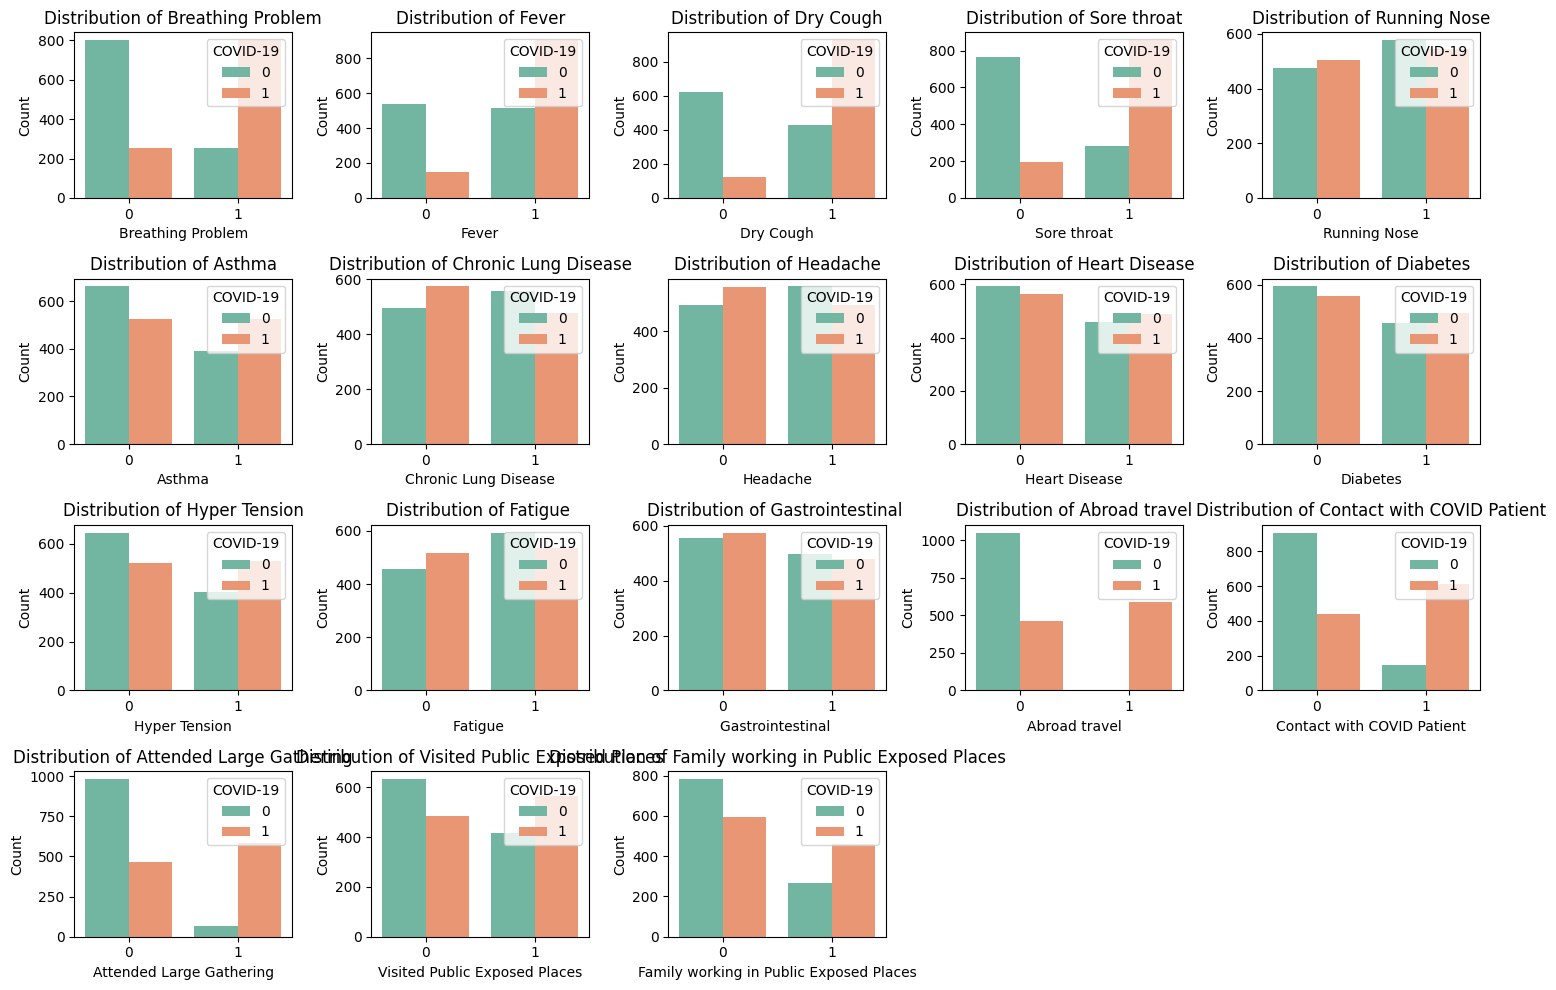

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(4, 5, i)
    sns.countplot(x=column, hue='COVID-19', data=df, palette='Set2')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='COVID-19', loc='upper right')

plt.tight_layout()
plt.show()

### Confusion Matrix Heatmap

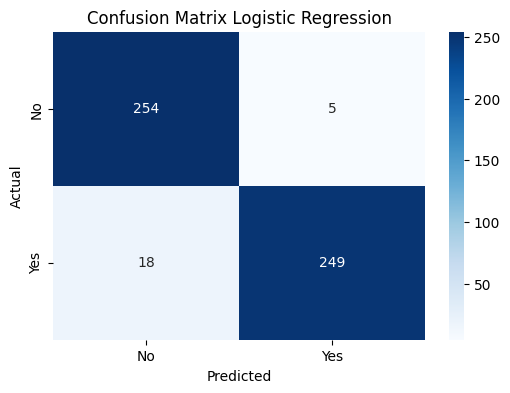

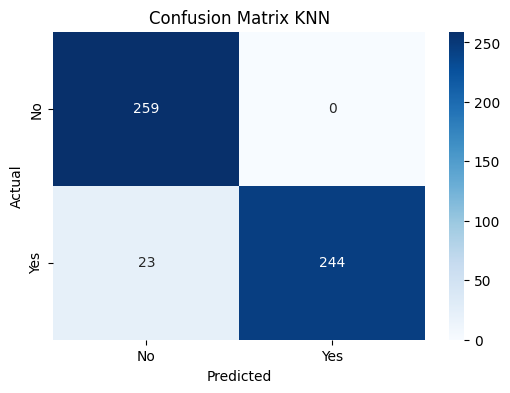

In [ ]:
conf_matrix = confusion_matrix(y_test, y_predLR)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

conf_matrix = confusion_matrix(y_test, y_predKNN)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

### Feature Importance

                                    Feature  Importance
13                            Abroad travel   22.688285
15                 Attended Large Gathering   14.637395
0                         Breathing Problem   12.432476
2                                 Dry Cough    9.527632
3                               Sore throat    9.323021
14               Contact with COVID Patient    7.462604
1                                     Fever    5.083263
17  Family working in Public Exposed Places    2.968734
16            Visited Public Exposed Places    2.029498
4                              Running Nose    1.798226
11                                 Fatigue     1.784451
12                        Gastrointestinal     1.683535
5                                    Asthma    1.617449
8                             Heart Disease    1.586561
10                            Hyper Tension    1.553285
6                      Chronic Lung Disease    1.545101
7                                  Headache    1

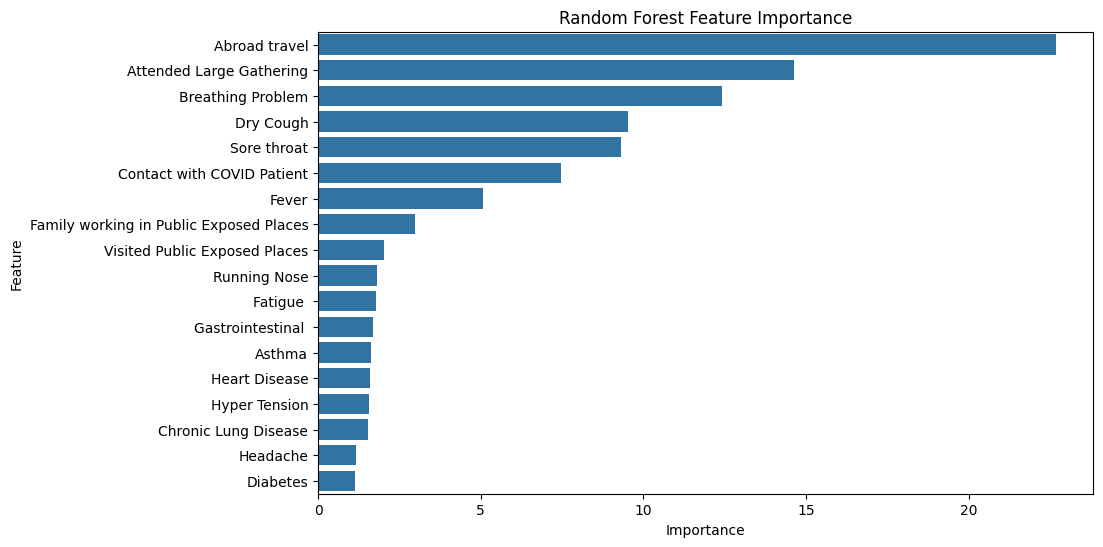

In [ ]:
X = df.drop('COVID-19', axis=1)
y = df['COVID-19']

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df['Importance'] = (feature_importance_df['Importance'] / feature_importance_df['Importance'].sum()) * 100

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### ROC Curve & AUC Score

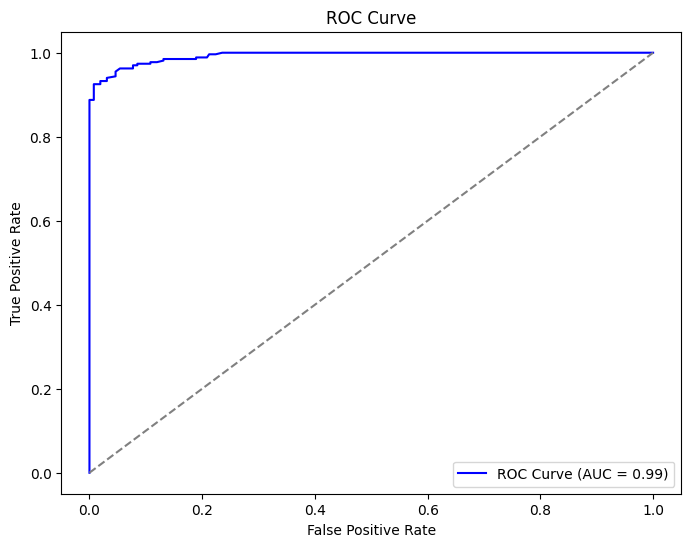

In [ ]:
y_prob = modelLR.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()